## Optimize evaluation parameters for custom model

In [1]:
from cellpose import models, io
import os
import numpy as np
from skimage.io import imread
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
from matplotlib import pyplot as plt
from tnia.deeplearning.dl_helper import quantile_normalization, get_label_paths

In [2]:
parent_path =r'D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit'
model_path = os.path.join(parent_path, 'models')
model_name = 'cellpose_20241219_090937'

model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))

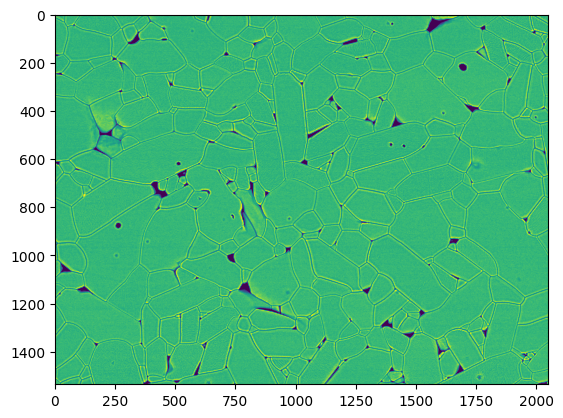

In [4]:
im_name = '211122_AM_Al2O3_SE_021.ome.tiff'
im = imread(os.path.join(parent_path, im_name))
im = quantile_normalization(im, channels=True)
plt.imshow(im)

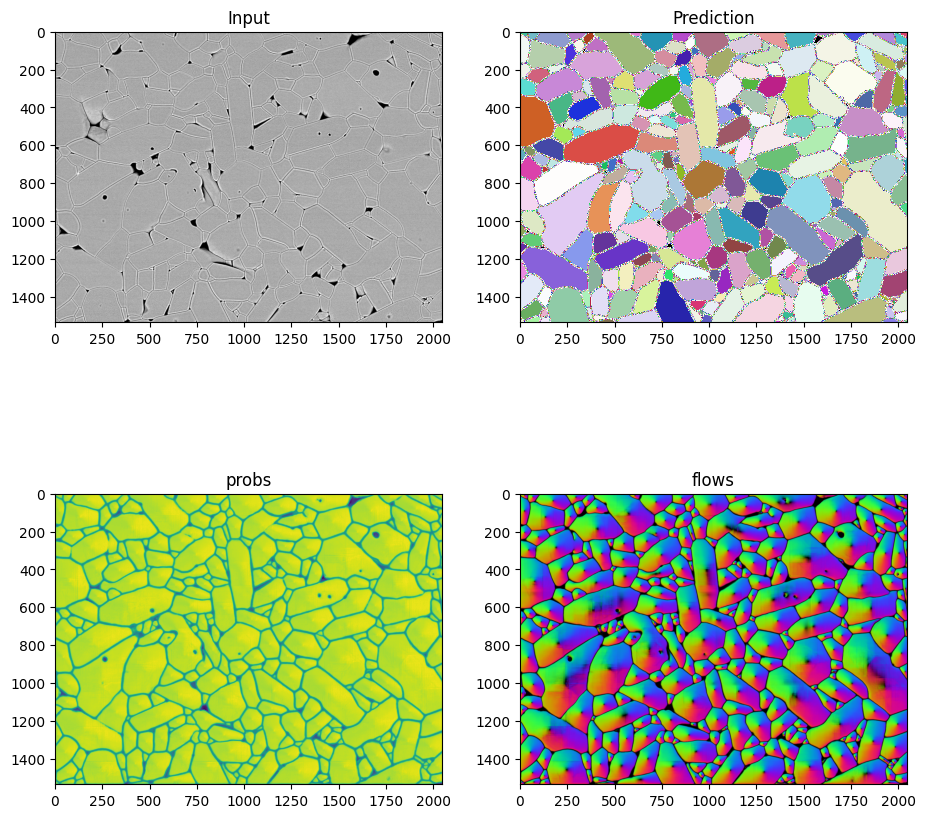

In [5]:
masks= model.eval(im, diameter=30, bsize=1024, niter=2000, channels=[0,0], cellprob_threshold=-4.0, flow_threshold=4)
colormaps = ['gray', random_label_cmap(), 'viridis', 'gray']
fig = imshow_multi2d([im, masks[0], masks[1][2], masks[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=11, height=11)

In [9]:
from skimage.io import imsave
imsave(os.path.join(parent_path, "cellpose_custom_segmented.tif"), masks[0])

C:\Users\bnort\AppData\Local\Temp\ipykernel_55904\3803868056.py:2: UserWarning: D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit\cellpose_custom_segmented.tif is a low contrast image
  imsave(os.path.join(parent_path, "cellpose_custom_segmented.tif"), masks[0])


In [15]:
import napari

viewer = napari.Viewer()
viewer.add_image(im, name='image')
viewer.add_labels(masks[0], name='predicted labels')
viewer.add_image(masks[1][2], name='probs')
viewer.add_image(masks[1][0], name='flows')

<Image layer 'flows' at 0x1ec2e5d61a0>